In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import re
from nltk import download
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
from nltk.stem import WordNetLemmatizer

download('stopwords')
download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikunj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nikunj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# task 1 - loading
data=pd.read_json("recipes.json",lines=True)
data.head(5)
data.info()
data['Ingredients'].head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1617 non-null   object
 1   url          1617 non-null   object
 2   Description  1429 non-null   object
 3   Author       1611 non-null   object
 4   Ingredients  1617 non-null   object
 5   Method       1617 non-null   object
dtypes: object(6)
memory usage: 75.9+ KB


0    [2 tbsp olive oil, knob butter, 1 onion, finel...
1    [175g butter, chopped, 200g dark muscovado sug...
2    [200g dark muscovado sugar, 175g butter, chopp...
3    [500g strong white flour, plus extra for dusti...
4    [280g self-raising flour, 175g golden caster s...
Name: Ingredients, dtype: object

In [4]:
# task 2 - cleaning
data['Ingredients'] = data['Ingredients'].map(lambda x: re.sub(r'[^a-zA-Z ] ', ' ', str(x))) # remove non-characters

In [5]:
data = data.dropna(subset=['Ingredients']) # remove ingredients with no text

In [6]:
stop = stopwords.words('english') + ['tsp', 'tbsp', 'finely', 'extra', 'chopped']
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
# task 3 - remove encoding
def remove_encoding_word(word):
    word = str(word)
    word = word.encode('ASCII','ignore').decode('ASCII')
    return word

In [8]:
def remove_encoding_text(text):
    text = str(text)
    text = " ".join(remove_encoding_word(word) for word in text.split() if word not in stop)
    return text

In [29]:
remove_encoding_text("leaves tree universe")

'leaves tree niverse'

In [9]:
# task 4 - define lemmatizing
data['Ingredients'] = data['Ingredients'].apply(remove_encoding_text)

In [10]:
text = " ".join(words for words in data['Ingredients'])
len(text)

408959

In [11]:
lemma = WordNetLemmatizer().lemmatize

In [12]:
lemma('leaves')

'leaf'

In [53]:
lemma('articles')

'article'

In [13]:
# task 5 - fit and transform text, with lemmatizing
# you can use 'tokens = [w for w in ...]' i.e. no lemmatizing
def tokenize(document):
    tokens = [lemma(w) for w in document.split() if len(w) > 3 and w.isalpha()]
    return tokens

In [31]:
# can use 2,2 for range
vectorizer = TfidfVectorizer(tokenizer = tokenize, ngram_range = ((2,2)), 
                             stop_words = stop, strip_accents = "unicode")

In [33]:
tdm = vectorizer.fit_transform(data['Ingredients'])

C:\Users\Nikunj\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [34]:
vectorizer.vocabulary_.items()

dict_items([('olive onion', 7420), ('onion sausagemeat', 7567), ('sausagemeat skinned', 9892), ('skinned zest', 10356), ('zest fresh', 13221), ('fresh white', 4402), ('white dried', 12786), ('dried apricot', 3644), ('apricot chestnut', 150), ('chestnut canned', 1858), ('canned fresh', 1387), ('fresh dried', 4333), ('dried cranberry', 3667), ('cranberry fresh', 2888), ('fresh boneless', 4310), ('boneless skinless', 775), ('skinless chicken', 10340), ('chicken pack', 1925), ('pack shortcrust', 7823), ('butter dark', 1176), ('dark muscovado', 3229), ('muscovado luxury', 7126), ('luxury mixed', 6567), ('mixed dried', 6989), ('dried fruit', 3683), ('fruit includes', 4496), ('includes mixed', 5598), ('mixed peel', 7030), ('peel glac', 8112), ('glac grated', 4707), ('grated zest', 4961), ('zest juice', 13231), ('juice grated', 5673), ('zest cherry', 13210), ('cherry brandy', 1810), ('brandy brandy', 845), ('brandy plus', 859), ('plus macadamia', 8748), ('macadamia large', 6570), ('large egg',

In [54]:
# task 6 -  get word frequencies and create wordcloud
tfidf_weights = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

In [55]:
tfidf_weights[0:10]

[('olive onion', 5.824471514115579),
 ('onion sausagemeat', 0.2583004743669975),
 ('sausagemeat skinned', 0.2583004743669975),
 ('skinned zest', 0.2583004743669975),
 ('zest fresh', 0.5822854727031399),
 ('fresh white', 4.835339428289038),
 ('white dried', 0.6984758317551231),
 ('dried apricot', 6.028291416266405),
 ('apricot chestnut', 0.2583004743669975),
 ('chestnut canned', 0.2583004743669975)]

In [56]:
w = WordCloud(width=1500,height=1200,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(tfidf_weights))

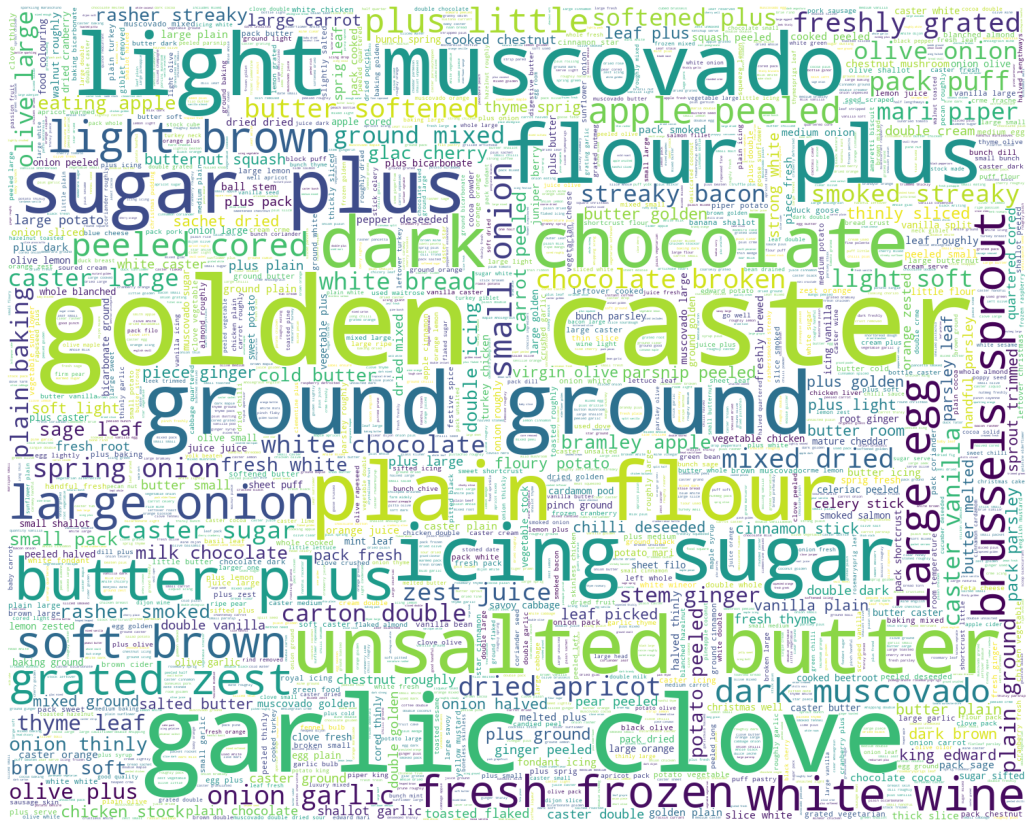

In [48]:
# all below in a single cell
plt.figure(figsize=(20,15))
plt.imshow(w)
plt.axis('off')
plt.savefig('recipes_wordcloud.png')